Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64
Mean Squared Error: 25.227041467388958
Predicted Future Price: 259.6276006899999


c:\Users\Ogweno\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


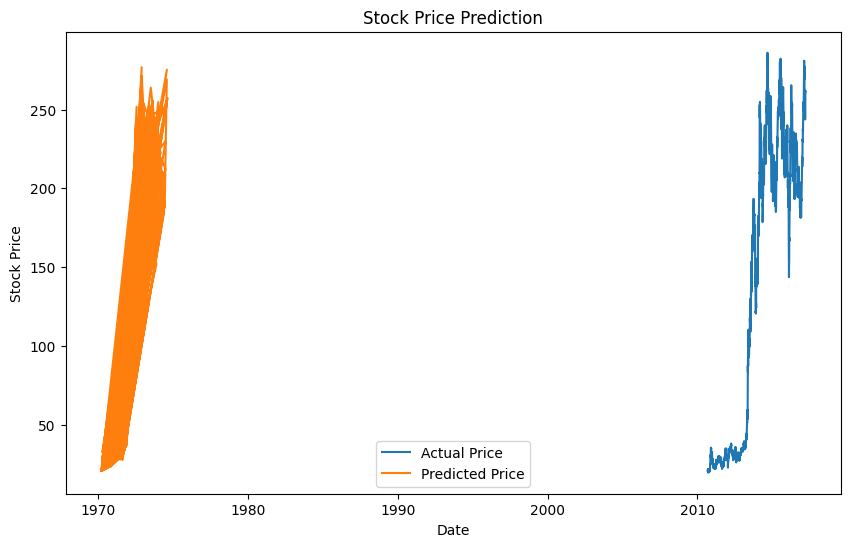

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Data Collection
# Download historical stock price data from a reliable source (e.g., Yahoo Finance)
# For this example, let's assume you have a CSV file named 'stock_data.csv'
df = pd.read_csv('../Tesla.csv - Tesla.csv.csv')

# Step 2: Data Preprocessing
# Assuming your dataset has a 'Date' column, convert it to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Handle missing values if any
# For simplicity, you can use forward-fill or backward-fill
df = df.bfill()

# Step 3: Feature Engineering
# Create features based on historical prices
df['Daily_Return'] = df['Close'].pct_change()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Drop rows with NaN values created by moving averages
df = df.dropna()

# Step 4: Model Selection
# Let's use a RandomForestRegressor for simplicity
model = RandomForestRegressor()

# Step 5: Training
# Select features and target variable
features = df[['Daily_Return', 'MA_10', 'MA_50']]
target = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 6: Evaluation
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Step 7: Prediction
# Predict stock prices for future dates
# For simplicity, let's use the last available data for prediction
last_data = features.iloc[-1].values.reshape(1, -1)
future_price = model.predict(last_data)
print(f'Predicted Future Price: {future_price[0]}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Price')
plt.plot(X_test.index, predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


In [6]:
valid

NameError: name 'valid' is not defined